# Time series analysis on the data International Airline passengers from 1940 to 1960

In [4]:
# !pip install statsmodels

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
# data fetch from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.shape

(144, 2)

<Axes: xlabel='Month', ylabel='Passengers'>

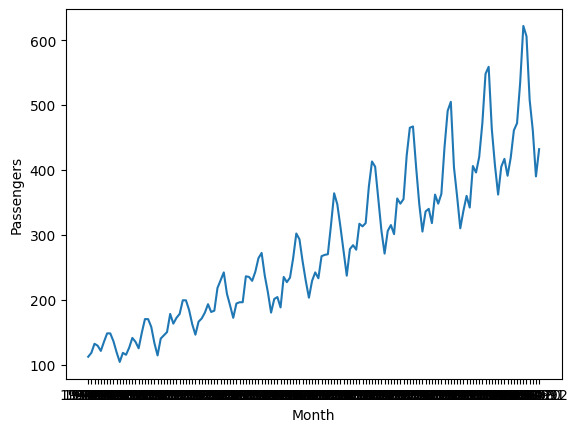

In [10]:
# plot this data to see trends and seasonality with seaborn
sns.lineplot(x="Month", y="Passengers", data=df)

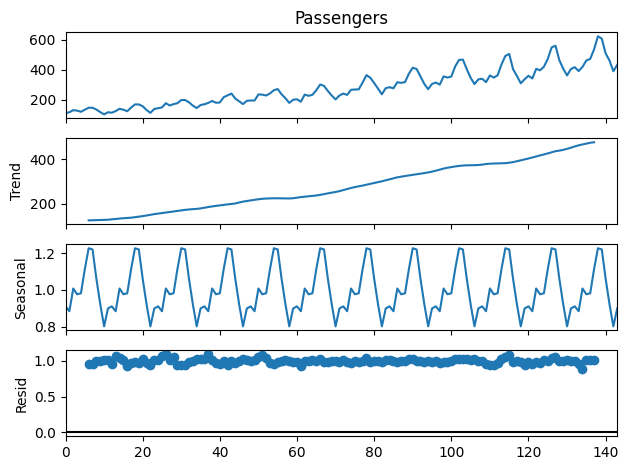

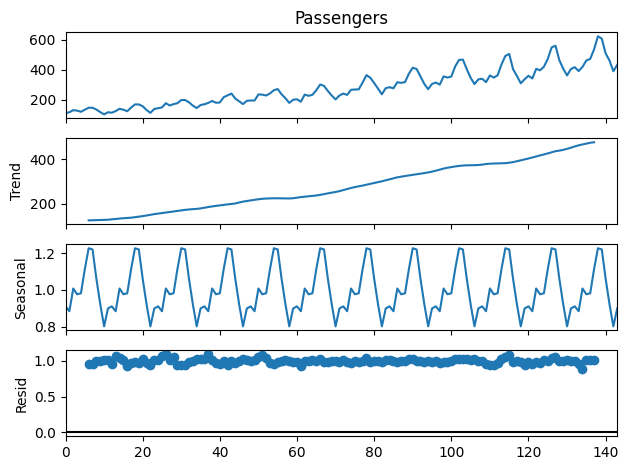

In [12]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df["Passengers"], model="multiplicative", period=12)
decompose.plot()

<Axes: >

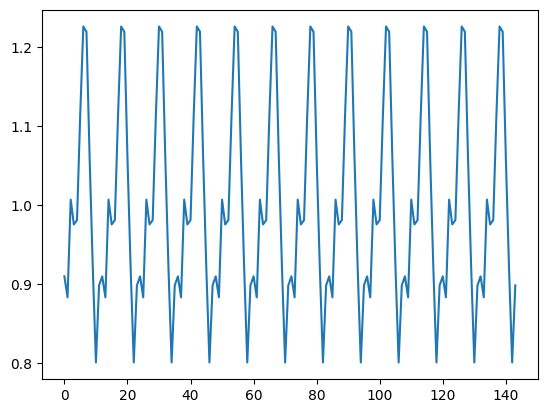

In [13]:
decompose.seasonal.plot()

In [14]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

In [15]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


c:\Users\Hasnain\miniconda3\envs\tnf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 23088.3242 - root_mean_squared_error: 151.3287
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6026.0562 - root_mean_squared_error: 77.3733 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1214.1793 - root_mean_squared_error: 34.7770
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1289.9586 - root_mean_squared_error: 35.4994
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1392.6873 - root_mean_squared_error: 37.2815
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1089.1136 - root_mean_squared_error: 32.8704
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1297.1212 - root_mean_squared_error: 35.9796 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1202.8148 - root_mean_squared_error: 34.6295 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1006.8945 - root_mean_squared_error: 31.5966
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - l

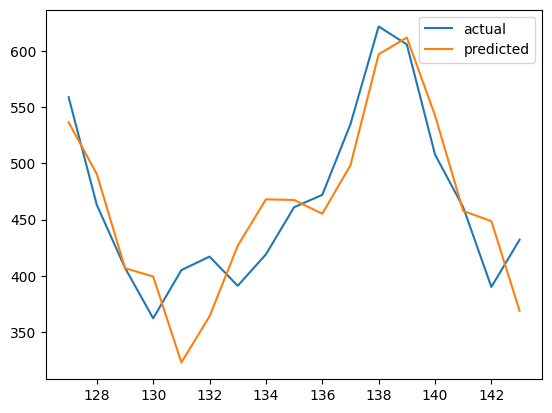

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["Passengers"].values[n_lags:])
X_test = np.array([test["Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()
